In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from imblearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from sklearn.tree import DecisionTreeClassifier

In [30]:
df = pd.read_csv('Customer-Churn.csv')

In [31]:
df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes


Data Cleaning

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   OnlineSecurity    7043 non-null   object 
 7   OnlineBackup      7043 non-null   object 
 8   DeviceProtection  7043 non-null   object 
 9   TechSupport       7043 non-null   object 
 10  StreamingTV       7043 non-null   object 
 11  StreamingMovies   7043 non-null   object 
 12  Contract          7043 non-null   object 
 13  MonthlyCharges    7043 non-null   float64
 14  TotalCharges      7043 non-null   object 
 15  Churn             7043 non-null   object 
dtypes: float64(1), int64(2), object(13)
memory

In [33]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce').fillna(value=0)
df.loc[df['Churn'] == 'Yes', 'Churn'] = 1
df.loc[df['Churn'] == 'No', 'Churn'] = 0
df['Churn'] = pd.to_numeric(df['Churn'])

In [34]:
[print(col, df[col].unique()) for col in df.select_dtypes('object')];

gender ['Female' 'Male']
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
PhoneService ['No' 'Yes']
OnlineSecurity ['No' 'Yes' 'No internet service']
OnlineBackup ['Yes' 'No' 'No internet service']
DeviceProtection ['No' 'Yes' 'No internet service']
TechSupport ['No' 'Yes' 'No internet service']
StreamingTV ['No' 'Yes' 'No internet service']
StreamingMovies ['No' 'Yes' 'No internet service']
Contract ['Month-to-month' 'One year' 'Two year']


In [35]:
df.select_dtypes('number').head(2)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
0,0,1,29.85,29.85,0
1,0,34,56.95,1889.50,0


EDA

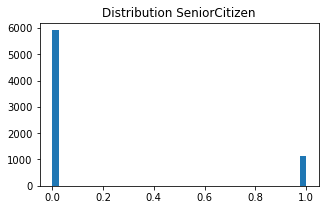

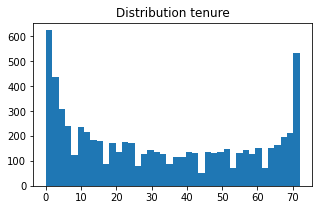

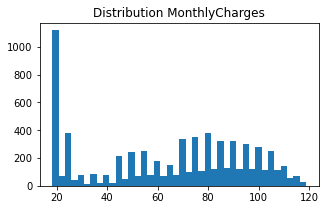

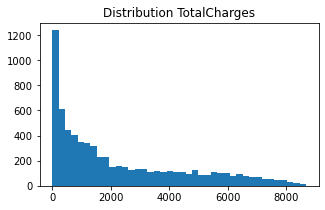

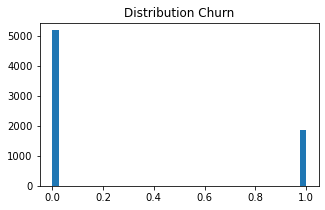

In [36]:
plt.rcParams["figure.figsize"] = (5,3)
for col in df.select_dtypes('number'):
    plt.hist(df[col], bins=40)
    plt.title(f'Distribution {col}')
    plt.show()

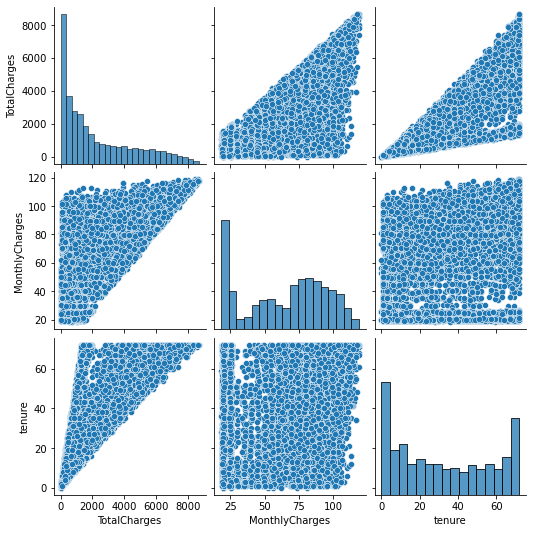

In [37]:
sns.pairplot(df[['TotalCharges', 'MonthlyCharges', 'tenure']])

In [38]:
def custom_pipeline(sampler, model):
    return Pipeline([
        ('scaler',  ColumnTransformer([
            ("numericals", MinMaxScaler(), df.select_dtypes('number').drop('Churn', axis=1).columns),
            ("categoricals", OneHotEncoder(sparse=False), df.select_dtypes('object').columns)
        ])),
        ('sampler', sampler),
        ('model', model)
    ])

In [39]:
def show_confusion_matrix(y_pred, y_test, classes, title):
    cm = confusion_matrix(y_test, y_pred, labels=classes)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
    disp.plot(colorbar=False)
    disp.ax_.set_title(title)
    plt.show()

In [40]:
y = df['Churn']
X = df.drop('Churn', axis=1)

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=12)

Model Comparisson

Use SMOTE with Logistic Regression and Decision Tree Classifier

C:\Users\EU\AppData\Roaming\Python\Python39\site-packages\sklearn\preprocessing\_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


LogisticRegression - SMOTE
              precision    recall  f1-score   support

           0       0.90      0.74      0.81      1035
           1       0.52      0.77      0.62       374

    accuracy                           0.75      1409
   macro avg       0.71      0.76      0.72      1409
weighted avg       0.80      0.75      0.76      1409



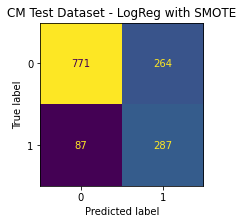

In [42]:
clf1 = custom_pipeline(SMOTE(), LogisticRegression())
clf1.fit(X_train, y_train)

y_pred_clf1 = clf1.predict(X_test)
print('LogisticRegression - SMOTE')
print(classification_report(y_test, y_pred_clf1))
show_confusion_matrix(y_pred_clf1, y_test, clf1[2].classes_, 'CM Test Dataset - LogReg with SMOTE')

C:\Users\EU\AppData\Roaming\Python\Python39\site-packages\sklearn\preprocessing\_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Decision Tree Classifier - SMOTE
              precision    recall  f1-score   support

           0       0.84      0.77      0.80      1035
           1       0.48      0.59      0.53       374

    accuracy                           0.72      1409
   macro avg       0.66      0.68      0.67      1409
weighted avg       0.74      0.72      0.73      1409



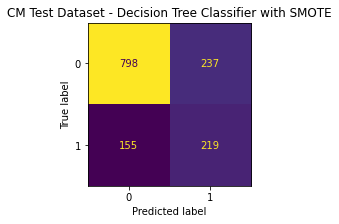

In [43]:
clf2 = custom_pipeline(SMOTE(), DecisionTreeClassifier())
clf2.fit(X_train, y_train)

y_pred_clf2 = clf2.predict(X_test)
print('Decision Tree Classifier - SMOTE')
print(classification_report(y_test, y_pred_clf2))
show_confusion_matrix(y_pred_clf2, y_test, clf2[2].classes_, 
                      'CM Test Dataset - Decision Tree Classifier with SMOTE')

In [53]:
def create_comparisson_table():
    return pd.DataFrame([], columns=['model', 'sampler', 'f1_score', 'yes_f1', \
                                          'yes_precision', 'yes_recall', 'no_f1', 'no_precision', 'no_recall'])


def add_scores_to_overall_results(df_results, scores_test, sampler, estimator):
    df_results.loc[df_results.shape[0]] = [get_class_name(estimator), get_class_name(sampler) if sampler else None,
                                          scores_test.at["accuracy","f1-score"], scores_test.at["1","f1-score"],
                                          scores_test.at["1","precision"], scores_test.at["1","recall"],
                                          scores_test.at["0","f1-score"], scores_test.at["0","precision"],
                                          scores_test.at["0","recall"]]
    
def get_class_name(cl):
    return cl.__class__.__name__

In [54]:
models_smote = create_comparisson_table()

In [55]:
add_scores_to_overall_results(models_smote, 
                              pd.DataFrame(classification_report(y_test, y_pred_clf1, output_dict=True)).T, 
                              clf1[1], 
                              clf1[2])

add_scores_to_overall_results(models_smote, 
                              pd.DataFrame(classification_report(y_test, y_pred_clf2, output_dict=True)).T, 
                              clf2[1], 
                              clf2[2])

In [58]:
models_smote

,model,sampler,f1_score,yes_f1,yes_precision,yes_recall,no_f1,no_precision,no_recall
0,LogisticRegression,SMOTE,0.750887,0.620541,0.520871,0.767380,0.814580,0.898601,0.744928
1,DecisionTreeClassifier,SMOTE,0.721789,0.527711,0.480263,0.585561,0.802817,0.837356,0.771014


Use TomekLinks with Logistic Regression and Decision Tree Classifier

C:\Users\EU\AppData\Roaming\Python\Python39\site-packages\sklearn\preprocessing\_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


LogisticRegression - TomekLinks
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1035
           1       0.61      0.62      0.62       374

    accuracy                           0.79      1409
   macro avg       0.74      0.74      0.74      1409
weighted avg       0.80      0.79      0.79      1409



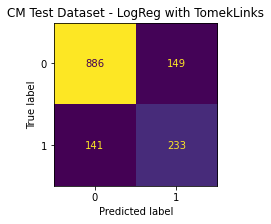

In [21]:
clf3 = custom_pipeline(TomekLinks(), LogisticRegression())
clf3.fit(X_train, y_train)

y_pred_clf3 = clf3.predict(X_test)
print('LogisticRegression - TomekLinks')
print(classification_report(y_test, y_pred_clf3))
show_confusion_matrix(y_pred_clf3, y_test, clf3[2].classes_, 'CM Test Dataset - LogReg with TomekLinks')

C:\Users\EU\AppData\Roaming\Python\Python39\site-packages\sklearn\preprocessing\_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Decision Tree Classifier - TomekLinks
              precision    recall  f1-score   support

           0       0.85      0.80      0.82      1035
           1       0.52      0.61      0.56       374

    accuracy                           0.75      1409
   macro avg       0.69      0.70      0.69      1409
weighted avg       0.76      0.75      0.75      1409



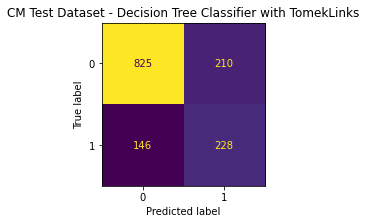

In [22]:
clf4 = custom_pipeline(TomekLinks(), DecisionTreeClassifier())
clf4.fit(X_train, y_train)

y_pred_clf4 = clf4.predict(X_test)
print('Decision Tree Classifier - TomekLinks')
print(classification_report(y_test, y_pred_clf4))
show_confusion_matrix(y_pred_clf4, y_test, clf4[2].classes_, 
                      'CM Test Dataset - Decision Tree Classifier with TomekLinks')

In [23]:
models_tl = create_comparisson_table()
add_scores_to_overall_results(models_tl, 
                              pd.DataFrame(classification_report(y_test, y_pred_clf3, output_dict=True)).T, 
                              clf3[1], 
                              clf3[2])

add_scores_to_overall_results(models_tl, 
                              pd.DataFrame(classification_report(y_test, y_pred_clf4, output_dict=True)).T, 
                              clf4[1], 
                              clf4[2])

In [24]:
models_tl

,model,sampler,f1_score,yes_f1,yes_precision,yes_recall,no_f1,no_precision,no_recall
0,LogisticRegression,TomekLinks,0.794180,0.616402,0.609948,0.622995,0.859360,0.862707,0.856039
1,DecisionTreeClassifier,TomekLinks,0.747339,0.561576,0.520548,0.609626,0.822532,0.849640,0.797101
